In [1]:
from PIL import Image

In [2]:
import numpy as np
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from IPython.display import display

Using TensorFlow backend.


In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

y = 1


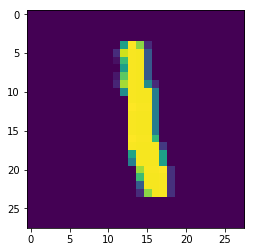

In [4]:
# Example of a picture
index = 6
plt.imshow(x_train[index])
print ("y = " + str(y_train[index]))

In [5]:
# Explore your dataset 
m_train = x_train.shape[0]
num_px = x_train.shape[1]
m_test = x_test.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px)+")")
print ("train_x_orig shape: " + str(x_train.shape))
print ("train_y shape: " + str(y_train.shape))
print ("test_x_orig shape: " + str(x_test.shape))
print ("test_y shape: " + str(y_test.shape))

Number of training examples: 60000
Number of testing examples: 10000
Each image is of size: (28, 28)
train_x_orig shape: (60000, 28, 28)
train_y shape: (60000,)
test_x_orig shape: (10000, 28, 28)
test_y shape: (10000,)


In [6]:
# Reshape the training and test examples 
train_x = x_train.reshape((60000,28,28,1)) # The "-1" makes reshape flatten the remaining dimensions
test_x= x_test.reshape((10000,28,28,1))
input_shape=(28,28,1)
train_x=train_x.astype('float32')
test_x=test_x.astype('float32')

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (60000, 28, 28, 1)
test_x's shape: (10000, 28, 28, 1)


In [7]:
model=Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [8]:
model=Sequential()
model.add(Conv2D(6,kernel_size=(1,1),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(16,kernel_size=(5,5),input_shape=(14,14,6)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Flatten())
model.add(Dense(120,activation=tf.nn.relu))
model.add(Dense(84,activation=tf.nn.relu))
model.add(Dense(10,activation=tf.nn.softmax))

In [9]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
model.fit(x=train_x,y=y_train,epochs=30)

Epoch 1/30
60000/60000 [==============================] - 37s 609us/step - loss: 0.2015 - acc: 0.9387
Epoch 2/30
60000/60000 [==============================] - 24s 399us/step - loss: 0.0735 - acc: 0.9768
Epoch 3/30
60000/60000 [==============================] - 24s 401us/step - loss: 0.0518 - acc: 0.9835
Epoch 4/30
60000/60000 [==============================] - 24s 401us/step - loss: 0.0404 - acc: 0.9872
Epoch 5/30
60000/60000 [==============================] - 24s 401us/step - loss: 0.0328 - acc: 0.9890
Epoch 6/30
60000/60000 [==============================] - 25s 410us/step - loss: 0.0269 - acc: 0.9914
Epoch 7/30
60000/60000 [==============================] - 24s 406us/step - loss: 0.0234 - acc: 0.9923
Epoch 8/30
60000/60000 [==============================] - 26s 426us/step - loss: 0.0197 - acc: 0.9931
Epoch 9/30
60000/60000 [==============================] - 24s 399us/step - loss: 0.0181 - acc: 0.9942
Epoch 10/30
60000/60000 [==============================] - 24s 406us/step - loss: 

In [12]:
preds = model.evaluate(x=test_x,y=y_test)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

10000/10000 [==============================] - 2s 178us/step

Loss = 0.06743488960523318
Test Accuracy = 0.9875


Predicted No is:  3


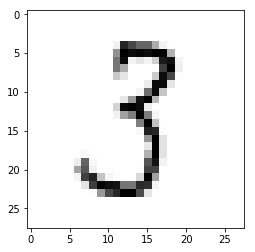

In [26]:
image_index=231
plt.imshow(x_test[image_index].reshape(28,28),cmap='Greys')
pred=model.predict(x_test[image_index].reshape(1, 28,28, 1))
print("Predicted No is: ",pred.argmax())

Predicted No is:  3


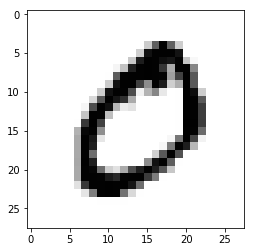

In [28]:
img_path = 'images/zero.png'
img = image.load_img(img_path, target_size=(28, 28),color_mode="grayscale")
plt.imshow(img)
x = image.img_to_array(img)
pred=model.predict(x.reshape(1, 28,28, 1))
print("Predicted No is: ",pred.argmax())